## Investigating track position on playlist

*Imports*

In [40]:
import psycopg2
import config
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
conn = psycopg2.connect(config.POSTGRES_ADDRESS)

In [42]:
statement = '''
    SELECT playlist_track.track_uri, (playlist_track.pos::decimal/playlist.num_tracks::decimal) AS relative_position
    FROM playlist_track
    JOIN playlist ON playlist_track.pid=playlist.pid
    WHERE playlist.num_tracks > 10
    LIMIT 1000000
    '''
df = pd.read_sql_query(statement, conn)
df.head()

,track_uri,relative_position
0,spotify:track:0M9VqYG0wVun054JIdwFO8,0.000000
1,spotify:track:3utIAb67sOu0QHxBE88P1M,0.006993
2,spotify:track:1HwpWwa6bnqqRhK8agG4RS,0.013986
3,spotify:track:0J1Wfjo9H3R62yaCuuNDZX,0.020979
4,spotify:track:4I2GqMe7L2ccMpUbnDzYLH,0.027972


In [43]:
conn.close()

In [45]:
track_list = ['spotify:track:7KXjTSCq5nL1LoYtL7XAwS', 'spotify:track:1xznGGDReH1oQq0xzbwXa3',
              'spotify:track:7yyRTcZmCiyzzJlNzGC9Ol', 'spotify:track:7w9bgPAmPTtrkt2v16QWvQ']
curated_tracks = df.loc[df['track_uri'].isin(track_list)]

<AxesSubplot:xlabel='track_uri', ylabel='relative_position'>

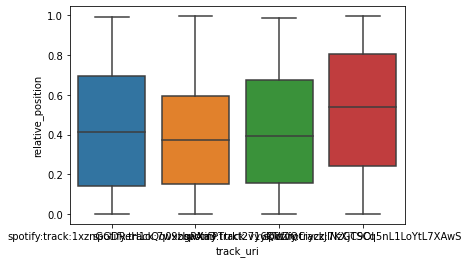

In [46]:
sns.boxplot(x='track_uri', y='relative_position', data=curated_tracks)